In [1]:
!ls

model_architecture.py  resnet.py  sample_data  train_test.py


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
from model_architecture import *
from train_test import *
from resnet import ResNet18

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = 128
num_workers = 1
pin_memory = True
input_size = (3,32,32)

In [5]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import sys

torch.manual_seed(1)
#kwargs = {'num_workers': config.num_workers, 'pin_memory': config.pin_memory} if config.use_cuda else {}
kwargs = {'num_workers': num_workers, 'pin_memory': pin_memory} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.RandomCrop(32, padding=4),
                       transforms.RandomHorizontalFlip(),
                       transforms.RandomRotation((-8.0, 8.0)),                                                 
                       #transforms.RandomRotation((-8.0, 8.0), fill=(1,)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
                   ])),
    #batch_size=config.batch_size, shuffle=True, **kwargs)
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])),
    #batch_size=config.batch_size, shuffle=True, **kwargs)
    batch_size=batch_size, shuffle=True, **kwargs)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified


In [6]:
from __future__ import print_function
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import sys

accu = []
loss_test = []

print(input_size)

model_ = ResNet18().to(device)
print(model_summary(model_, input_size))

(3, 32, 32)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14       

In [7]:
optimizer = optim.SGD(model_.parameters(), lr=0.016, momentum=0.9, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=2, gamma=0.92)

valid_acc = []
loss_test_ = []
l1_regularization = [0, 1]
for epoch in range(1,30):
    train(model_, device, train_loader, optimizer, epoch, l1_regularization)
    scheduler.step()
    valid_a, valid_l = test(model_, device, test_loader)
    # Appending to loss and accuracy lists
    valid_acc.append(valid_a)
    loss_test_.append(valid_l)

accu.append(valid_acc)
loss_test.append(loss_test_)

Epoch: 1,LR: 0.016.
Train set: train Average loss: 1.2079, train_Accuracy: 22856/50000 (45.7120%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5717/10000 (57.1700%)



Epoch: 2,LR: 0.016.
Train set: train Average loss: 0.8705, train_Accuracy: 32423/50000 (64.8460%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6809/10000 (68.0900%)



Epoch: 3,LR: 0.01472.
Train set: train Average loss: 0.9030, train_Accuracy: 36466/50000 (72.9320%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7471/10000 (74.7100%)



Epoch: 4,LR: 0.01472.
Train set: train Average loss: 0.4349, train_Accuracy: 38461/50000 (76.9220%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7683/10000 (76.8300%)



Epoch: 5,LR: 0.013542400000000001.
Train set: train Average loss: 0.7878, train_Accuracy: 39953/50000 (79.9060%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7798/10000 (77.9800%)



Epoch: 6,LR: 0.013542400000000001.
Train set: train Average loss: 0.5564, train_Accuracy: 40825/50000 (81.6500%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8080/10000 (80.8000%)



Epoch: 7,LR: 0.012459008000000002.
Train set: train Average loss: 0.4964, train_Accuracy: 41860/50000 (83.7200%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8111/10000 (81.1100%)



Epoch: 8,LR: 0.012459008000000002.
Train set: train Average loss: 0.3179, train_Accuracy: 42350/50000 (84.7000%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8174/10000 (81.7400%)



Epoch: 9,LR: 0.011462287360000002.
Train set: train Average loss: 0.2351, train_Accuracy: 42977/50000 (85.9540%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8593/10000 (85.9300%)



Epoch: 10,LR: 0.011462287360000002.
Train set: train Average loss: 0.3075, train_Accuracy: 43328/50000 (86.6560%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8615/10000 (86.1500%)



Epoch: 11,LR: 0.010545304371200001.
Train set: train Average loss: 0.5913, train_Accuracy: 43937/50000 (87.8740%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8634/10000 (86.3400%)



Epoch: 12,LR: 0.010545304371200001.
Train set: train Average loss: 0.2811, train_Accuracy: 44115/50000 (88.2300%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8600/10000 (86.0000%)



Epoch: 13,LR: 0.009701680021504002.
Train set: train Average loss: 0.3109, train_Accuracy: 44599/50000 (89.1980%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8707/10000 (87.0700%)



Epoch: 14,LR: 0.009701680021504002.
Train set: train Average loss: 0.4172, train_Accuracy: 44829/50000 (89.6580%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8606/10000 (86.0600%)



Epoch: 15,LR: 0.008925545619783683.
Train set: train Average loss: 0.2378, train_Accuracy: 45332/50000 (90.6640%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8754/10000 (87.5400%)



Epoch: 16,LR: 0.008925545619783683.
Train set: train Average loss: 0.2109, train_Accuracy: 45496/50000 (90.9920%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8803/10000 (88.0300%)



Epoch: 17,LR: 0.008211501970200989.
Train set: train Average loss: 0.1528, train_Accuracy: 45668/50000 (91.3360%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8892/10000 (88.9200%)



Epoch: 18,LR: 0.008211501970200989.
Train set: train Average loss: 0.2243, train_Accuracy: 45937/50000 (91.8740%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8946/10000 (89.4600%)



Epoch: 19,LR: 0.007554581812584909.
Train set: train Average loss: 0.3475, train_Accuracy: 46222/50000 (92.4440%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8929/10000 (89.2900%)



Epoch: 20,LR: 0.007554581812584909.
Train set: train Average loss: 0.1462, train_Accuracy: 46314/50000 (92.6280%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8815/10000 (88.1500%)



Epoch: 21,LR: 0.006950215267578117.
Train set: train Average loss: 0.2260, train_Accuracy: 46656/50000 (93.3120%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8951/10000 (89.5100%)



Epoch: 22,LR: 0.006950215267578117.
Train set: train Average loss: 0.1604, train_Accuracy: 46703/50000 (93.4060%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9002/10000 (90.0200%)



Epoch: 23,LR: 0.006394198046171868.
Train set: train Average loss: 0.1465, train_Accuracy: 47027/50000 (94.0540%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9014/10000 (90.1400%)



Epoch: 24,LR: 0.006394198046171868.
Train set: train Average loss: 0.1401, train_Accuracy: 47096/50000 (94.1920%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9061/10000 (90.6100%)



Epoch: 25,LR: 0.005882662202478119.
Train set: train Average loss: 0.1754, train_Accuracy: 47273/50000 (94.5460%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9032/10000 (90.3200%)



Epoch: 26,LR: 0.005882662202478119.
Train set: train Average loss: 0.1158, train_Accuracy: 47443/50000 (94.8860%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9054/10000 (90.5400%)



Epoch: 27,LR: 0.005412049226279869.
Train set: train Average loss: 0.1398, train_Accuracy: 47562/50000 (95.1240%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9064/10000 (90.6400%)



Epoch: 28,LR: 0.005412049226279869.
Train set: train Average loss: 0.0729, train_Accuracy: 47717/50000 (95.4340%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9035/10000 (90.3500%)



Epoch: 29,LR: 0.00497908528817748.
Train set: train Average loss: 0.1269, train_Accuracy: 47794/50000 (95.5880%)




Test set: Average loss: 0.0024, Accuracy: 9059/10000 (90.5900%)



In [10]:
torch.save(model_.state_dict(),'/content/resnet.pt')

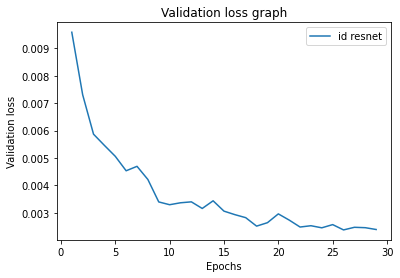

In [11]:
import matplotlib.pyplot as plt

x = [i for i in range(1,30)]
y = loss_test
Modelgraph = ['resnet']

plt.title("Validation loss graph")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
#plt.figure(figsize=(10,10))

for i in range(len(y)):
    plt.plot(x,y[i],label = 'id %s'%Modelgraph[i])

plt.legend()
#plt.show()
plt.savefig('Validation loss graph')

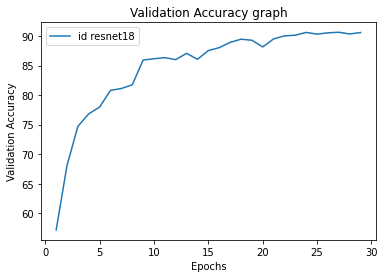

<Figure size 432x288 with 0 Axes>

In [12]:
x = [i for i in range(1,30)]
y = accu
Modelgraph = ['resnet18']


plt.title("Validation Accuracy graph")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")


for i in range(len(y)):
    plt.plot(x,y[i],label = 'id %s'%Modelgraph[i])

plt.legend()
plt.show()
plt.savefig('Validation Accuracy graph_')
